In [2]:
import numpy
import os

import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torchvision

from PIL import Image
import pathlib
import matplotlib.image as Img
import matplotlib.pyplot as plt

In [3]:
path = "C:\\Users\\revan\\Downloads\Cats_V1\\training_set\\training_set\\"


In [4]:
cats = list(pathlib.Path(path).glob("cats/*"))
dogs = list(pathlib.Path(path).glob("dogs/*"))
total = cats+dogs

In [5]:
len(total)

8007

In [6]:
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.Resize(500),
    transforms.CenterCrop(500),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                          [0.229, 0.224, 0.225])
])

In [9]:
batch = 128

model_data = torchvision.datasets.ImageFolder(path,transform=transform)
train_data = DataLoader(model_data,batch_size=batch,shuffle=True)

In [7]:
import torch.nn.functional as F
class CNN_model(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 3, 1)
        self.batch1 = nn.BatchNorm2d(6)
        self.conv2 = nn.Conv2d(6, 16, 3, 1)
        self.batch2 = nn.BatchNorm2d(16)
        self.conv3 = nn.Conv2d(16, 24, 3, 1)
        self.batch3 = nn.BatchNorm2d(24)
        
        self.fc1   = nn.Linear(24*60*60, 300)
        self.fc2   = nn.Linear(300, 200)
        self.fc3   = nn.Linear(200, 2)
            
    def forward(self, X):
        X = self.batch1(F.relu(self.conv1(X)))
        X = F.max_pool2d(X, 2, 2)
        
        X = self.batch2(F.relu(self.conv2(X)))
        X = F.max_pool2d(X, 2, 2)
        
        X = self.batch3(F.relu(self.conv3(X)))
        X = F.max_pool2d(X, 2, 2)
        
        # print(X.shape)
        X = X.view(-1, 24*60*60)
    
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = F.log_softmax(self.fc3(X) ,dim=1)
        
        return X

In [10]:
model = CNN_model()
optim = torch.optim.Adam(params=model.parameters(),lr=0.0001)
loss = nn.CrossEntropyLoss()

# hist,loss1 = training_loop(20,model=model,optimizer=optim,loss_fn=loss,train_loader=train_dataset_loader,valid_dl=valid_dataset_loader)
device = "cuda" if torch.cuda.is_available() else "cpu"

model.to(device)
# loss.to(device)
history = []
loss_val = []
for epoch in range(20):
    loss_train = 0
    for img, label in train_data:
        img = img.to(device)
        label = label.to(device)
        output = model(img)
        # print(output.squeeze(-1).shape,output.squeeze(-1))
        # print(output)
        # print(label)
        loss1 = loss(output,label)
        # print(loss1)
        loss1.backward()
        optim.step()
        optim.zero_grad()
        
        loss_train+=loss1.item()
    loss_val.append(loss1)

    # if epoch == 1 or epoch % 10 == 0:
    # val = validation_step(valid_dataset_loader, model, loss)
    # print('{} Epoch {}, Training loss {}'.format(
    #     datetime.datetime.now(), epoch,
    #     loss_train / len(train_loader)))
    print(f"Epoch [{epoch}/{20}] => loss: {loss1}")



Epoch [0/20] => loss: 0.6406143307685852
Epoch [1/20] => loss: 0.5995430946350098
Epoch [2/20] => loss: 0.5330257415771484
Epoch [3/20] => loss: 0.3553886115550995
Epoch [4/20] => loss: 0.3724331259727478
Epoch [5/20] => loss: 0.3684082627296448
Epoch [6/20] => loss: 0.308205783367157
Epoch [7/20] => loss: 0.26728343963623047
Epoch [8/20] => loss: 0.16931763291358948
Epoch [9/20] => loss: 0.1682077795267105
Epoch [10/20] => loss: 0.20366929471492767
Epoch [11/20] => loss: 0.20260541141033173
Epoch [12/20] => loss: 0.07665009796619415
Epoch [13/20] => loss: 0.17454291880130768
Epoch [14/20] => loss: 0.09718775749206543
Epoch [15/20] => loss: 0.1136048436164856
Epoch [16/20] => loss: 0.07502005249261856
Epoch [17/20] => loss: 0.04469931125640869
Epoch [18/20] => loss: 0.02241455391049385
Epoch [19/20] => loss: 0.029104184359312057


In [17]:
for epoch in range(10):
    loss_train = 0
    for img, label in train_data:
        img = img.to(device)
        label = label.to(device)
        output = model(img)
        # print(output.squeeze(-1).shape,output.squeeze(-1))
        # print(output)
        # print(label)
        loss1 = loss(output,label)
        # print(loss1)
        loss1.backward()
        optim.step()
        optim.zero_grad()
        
        loss_train+=loss1.item()
    loss_val.append(loss1)

    # if epoch == 1 or epoch % 10 == 0:
    # val = validation_step(valid_dataset_loader, model, loss)
    # print('{} Epoch {}, Training loss {}'.format(
    #     datetime.datetime.now(), epoch,
    #     loss_train / len(train_loader)))
    print(f"Epoch [{epoch}/{10}] => loss: {loss1}")

Epoch [0/10] => loss: 0.02600245364010334
Epoch [1/10] => loss: 0.0411231592297554
Epoch [2/10] => loss: 0.04675336182117462
Epoch [3/10] => loss: 0.045484282076358795
Epoch [4/10] => loss: 0.015066848136484623
Epoch [5/10] => loss: 0.06671083718538284
Epoch [6/10] => loss: 0.01218514982610941
Epoch [7/10] => loss: 0.02349011041224003
Epoch [8/10] => loss: 0.015253935940563679
Epoch [9/10] => loss: 0.018112165853381157


[0.6406143307685852, 0.5995430946350098, 0.5330257415771484, 0.3553886115550995, 0.3724331259727478, 0.3684082627296448, 0.308205783367157, 0.26728343963623047, 0.16931763291358948, 0.1682077795267105, 0.20366929471492767, 0.20260541141033173, 0.07665009796619415, 0.17454291880130768, 0.09718775749206543, 0.1136048436164856, 0.07502005249261856, 0.04469931125640869, 0.02241455391049385, 0.029104184359312057, 0.02600245364010334, 0.0411231592297554, 0.04675336182117462, 0.045484282076358795, 0.015066848136484623, 0.06671083718538284, 0.01218514982610941, 0.02349011041224003, 0.015253935940563679, 0.018112165853381157]


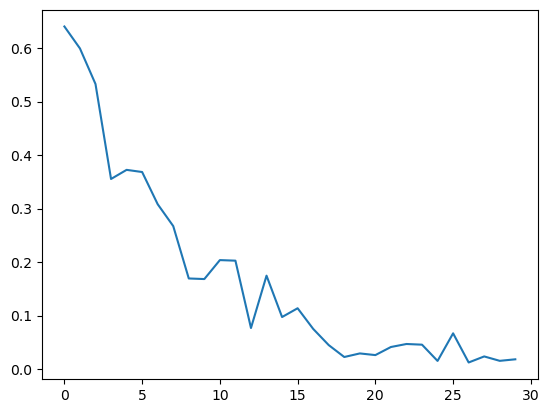

In [18]:
loss1 = []
for i in loss_val:
    loss1.append(i.item())
print(loss1)
plt.plot(range(len(loss1)),loss1)

In [12]:
test_transform = transforms.Compose([
    transforms.Resize(500),
    transforms.CenterCrop(500),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                          [0.229, 0.224, 0.225])
])

In [13]:
test_path = "C:\\Users\\revan\\Downloads\Cats_V1\\test_set\\test_set\\"
batch = 128

model_test_data = torchvision.datasets.ImageFolder(test_path,transform=test_transform)
test_data = DataLoader(model_test_data,batch_size=batch,shuffle=False)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


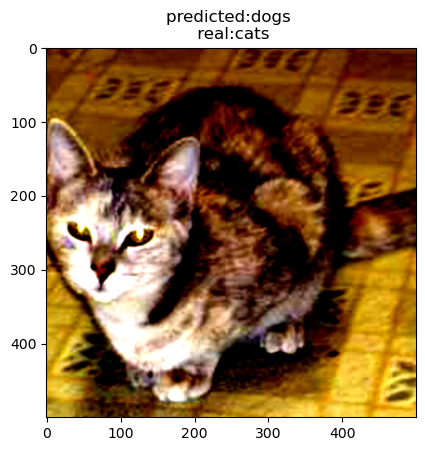

In [19]:
with torch.no_grad():
    test = []
    predicted = []

    for img,label in test_data:
        imgs = img[50].to(device)
        labels = label[50].to(device)
        test.append(labels)
        output_model = imgs.unsqueeze(0)
        # print(imgs.shape)
        output_model = model(output_model)
        # print(output_model)
        index = output_model.argmax()
        predicted.append(index)
        # imgs = torchvision.transforms.ToPILImage(imgs)
        plt.imshow(imgs.detach().cpu().numpy().transpose(1,2,0))
        plt.title(f"predicted:{ model_test_data.classes[index]} \n real:{ model_test_data.classes[labels]}")
        break

In [20]:
with torch.no_grad():
    correct = 0
    for X_test, y_test in test_data:
        X_test, y_test = X_test.to(device), y_test.to(device)
        y_val = model(X_test)
        predicted = torch.max(y_val,1)[1]
        correct += (predicted == y_test).sum()
        
print(f'Test accuracy: {correct.item()}/{len(model_test_data)} = {correct.item()*100/(len(model_test_data)):7.3f}%')

Test accuracy: 1513/2023 =  74.790%


In [1]:
print(loss1)

NameError: name 'loss1' is not defined

In [ ]:
print(loss1)